# 分类变量

adult 数据集的任务是预测一名工人的收入是高于50 000 美元还是低于50 000 美元这个数据集的特征包括工人的年龄、雇用方式(独立经营、私营企业员工、政府职员等).教育水平、性别、每周工作时长、职业，等等。下表给出了该数据集中的前几个条目。

In [1]:
import os
import pandas as pd
import mglearn
adult_path = os.path.join(mglearn.datasets.DATA_PATH, "adult.data")
data = pd.read_csv(
    adult_path, header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])
# For illustration purposes, we only select some of the columns
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
             'occupation', 'income']]
# IPython.display allows nice output formatting within the Jupyter notebook
display(data.head(10))

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K
5,37,Private,Masters,Female,40,Exec-managerial,<=50K
6,49,Private,9th,Female,16,Other-service,<=50K
7,52,Self-emp-not-inc,HS-grad,Male,45,Exec-managerial,>50K
8,31,Private,Masters,Female,50,Prof-specialty,>50K
9,42,Private,Bachelors,Male,40,Exec-managerial,>50K


这个任务属于分类任务，两个类别是收入 <=50k 和>50k。也可以预测具体收入，那样就变成了一个回归任务。但那样问题将变得更加困难，而理解 50K 的分界线本身也很有趣。

在这个数据集中，age(年龄)和hours-perweek (每周工作时长) 是连续特征，我们知道如何处理这种特征。但workclass (工作类型)、education (教育程度)、gender (性别)occupation (职业)都是分类特征。它们都来自一系列固定的可能取值 (而不是一个范围)，表示的是定性属性(而不是数量)。·

首先，假设我们想要在这个数据上学习一个Logislie 回归分类器。我们在前面学过Logistic 回归利用下列公式进行预测，预测值为:

y = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b > 0

其中w门和b是从训练集中学到的系数， 是输入特征。当 是数字时这个公式才有意义，但如果x2]是“Masters"或“Bachelors”的话，这个公式则没有意义。显然，在应用Logistic 回归时，我们需要换一种方式来表示数据。

## 1. One-Hot编码（虚拟变量）

到目前为止，表示分类变量最常用的方法就是使用one-hot 编码 (one-hot-encoding)或N取一编码(one-out-of-Nencoding)，也叫虚拟变量 (dummy variable)。虚拟变量背后的思想是将一个分类变量替换为一个或多个新特征，新特征取值为0和1。对于线性二分类(以及 scikit-learn中其他所有模型)的公式而言，0和1这两个值是有意义的，我们可以像这样对每个类别引入一个新特征，从而表示任意数量的类别。

比如说，workclass 特征的可能取值包括"Government Employee”、"Private Employee'"Self Employed"和"Self Employed Incorporated"。为了编码这4个可能的取值，我们创建了4个新特征，分别叫作"Government Employee"、"Private Employee"，"SelfEmployed”和"Self Employed Incorporated"。如果一个人的workclass取某个值，那么对应的特征取值为1，其他特征均取值为0。因此，对每个数据点来说，4个新特征中只有个的取值为1。这就是它叫作 one-hot 编码或N取一编码的原因。

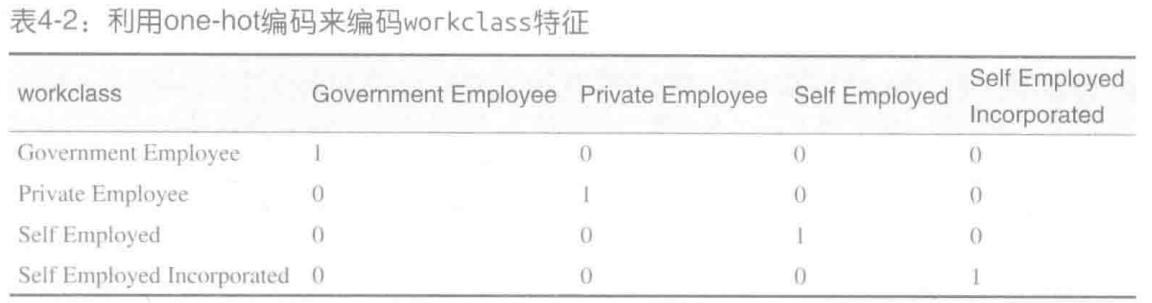

将数据转换为分类变量的one-hot 编码有两种方法:一种是使用 pandas，一种是使用scikit-learn。使用pandas 要稍微简单一些，所以选择这种方法。

In [2]:
import pandas as pd
from IPython.display import display

#文件中没有包含列名称的表头，因此我们传入header=None
#然后在"names"中显式地提供列名称
data = pd.read_csv("E:/clong/machine-learning/data/adult.data", header=None, index_col=False, 
                   names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "gender", "capital-gain","capital-loss","hours-per-week", "native-country","income"])
#为了便于说明，我们只选了其中几列
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']]
#IPython.display可以在Jupyter notebook中输出漂亮的格式
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


### (1)检查字符串编码的分类数据

读取完这样的数据集之后，最好先检查每一列是否包含有意义的分类数据。在处理人工(比如网站用户)输入的数据时，可能没有固定的类别，拼写和大小写也存在差异，因此可能需要预处理。举个例子，有人可能将性别填为“male”(男性)，有人可能填为“man”(男人)，而我们希望能用同一个类别来表示这两种输人。检查列的内容有一个好方法，就是使用pandas Series (Series是DataFrame中单列对应的数据类型)的value_counts函数，以显示唯一值及其出现次数:

In [3]:
data.gender.value_counts()

gender
 Male      21790
 Female    10771
Name: count, dtype: int64

可以看到，在这个数据集中性别刚好有两个值:Male和 Female，这说明数据格式已经很好，可以用one-hot 编码来表示。在实际的应用中，你应该查看并检查所有列的值。为简洁起见，这里我们将跳过这一步。

用pandas编码数据有一种非常简单的方法，就是使用get_dummies 函数。get_dummies函数自动变换所有具有对象类型 (比如字符串)的列或所有分类的列

In [4]:
print("Original features:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data, dtype=int)
print("Features after get_dummies:\n", list(data_dummies.columns))

Original features:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

Features after get_dummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-i

你可以看到，连续特征 age 和hours-per-week 没有发生变化，而分类特征的每个可能取值都被扩展为一个新特征:

In [5]:
display(data_dummies.head())

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


下面我们可以使用 values 属性将data dummies数据框(DataFrame) 转换为NumPy数组然后在其上训练一个机器学习模型。在训练模型之前，注意要把目标变量(现在被编码为两个income列)从数据中分离出来。将输出变量或输出变量的一些导出属性包含在特征表示中，这是构建监督机器学习模型时一个非常常见的错误。

在这个例子中，我们仅提取包含特征的列，也就是从age到occupation_ Transport-moving的所有列。这一范围包含所有特征，但不包含目标:

In [6]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
# Extract NumPy arrays
X = features.values
y = data_dummies['income_ >50K'].values
print("X.shape: {}  y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44)  y.shape: (32561,)


现在数据的表示方式可以被 scikit-learn 处理，我们可以像之前一样继续下一步:

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Test score: {:.2f}".format(logreg.score(X_test, y_test)))

Test score: 0.81


D:\python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 2. 用数字编码分类变量

在 adult 数据集的例子中，分类变量被编码为字符串。一方面，可能会有拼写错误，但另一方面，它明确地将一个变量标记为分类变量。无论是为了便于存储还是因为数据的收集方式，分类变量通常被编码为整数。例如，假设 adult 数据集中的人口普查数据是利用问卷收集的，workclass的回答被记录为0(在第一个框打勾)、1 (在第二个框打勾)、2(在第三个框打勾)，等等。现在该列包含数字0到8，而不是像“Private”这样的字符串。如果有人观察表示数据集的表格，很难一眼看出这个变量应该被视为连续变量还是分类变量。但是，如果知道这些数字表示的是就业状况，那么很明显它们是不同的状态，不应该用单个连续变量来建模。

分类特征通常用整数进行编码。它们是数字并不意味着它们必须被视为连续特征。一个整数特征应该被视为连续的还是离散的 (one-hot 编码的)，有时并不明确。如果在被编码的语义之间没有顺序关系(比如 workclass的例子)，那么特征必须被视为离散特征。对于其他情况(比如五星评分)，哪种编码更好取决于具体的任务和数据，以及使用哪种机器学习算法。

pandas的 get.dummies 函数将所有数字看作是连续的，不会为其创建虚拟变量。为了解决这个问题，你可以使用scikit-learn的 OneHotEncoder，指定哪些变量是连续的、哪些变量是离散的，你也可以将数据框中的数值列转换为字符串

In [8]:
# 创建一个DataFrame, 包含一个整数特征和一个分类字符串特征
demo_df = pd.DataFrame({'Integer Feature':[0, 1, 2, 1], 
                       'Categorical Feature':['socks', 'fox', 'socks', 'box']})
display(demo_df)

,Integer Feature,Categorical Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


使用 get_dummies 只会编码字符串特征，不会改变整数特征:

In [9]:
pd.get_dummies(demo_df)

,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,False,False,True
1,1,False,True,False
2,2,False,False,True
3,1,True,False,False


想为“Integer Feature”这一列创建虚拟变量，可以使用columns 参数显式地给出想要编码的列。干是两个特征都会被当作分类特征处理。

In [10]:
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
display(pd.get_dummies(demo_df, columns=['Integer Feature', 'Categorical Feature'], dtype=float))

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,0.0
